<a href="https://colab.research.google.com/github/dzarulhaziq/FeedForward/blob/main/BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import necessary packages
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import datetime
import os

In [ ]:
# Importing data
file_path = r"/content/drive/MyDrive/Colab Notebooks/Project/MiniProject1/Dataset/data.csv"
cancer_data = pd.read_csv(file_path)

#Droping not useful data
cancer_data = cancer_data.drop(['id',"Unnamed: 32"],axis=1)

In [ ]:
#Splitting the data into features and label
cancer_features = cancer_data.copy()
cancer_label = cancer_features.pop('diagnosis')

In [ ]:
#Check the data

print("------------------Features-------------------------")
print(cancer_features.head())
print("-----------------Label----------------------")
print(cancer_label.head())

------------------Features-------------------------
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_w

In [ ]:
#One hot encode label
cancer_label_OH = pd.get_dummies(cancer_label)
#Check the one-hot label
print("--------------------One-hot Label-----------------")
print(cancer_label_OH.head())

--------------------One-hot Label-----------------
   B  M
0  0  1
1  0  1
2  0  1
3  0  1
4  0  1


In [ ]:
#Split the features and labels into train-validation-test sets
#Using 60:20:20 split
SEED = 12345
x_train, x_iter, y_train, y_iter = train_test_split(cancer_features,cancer_label_OH,test_size=0.4,random_state=SEED)
x_val, x_test, y_val, y_test = train_test_split(x_iter,y_iter,test_size=0.5,random_state=SEED)

In [ ]:
#Data preparation is completed at this step
#Create a feedforward neural network using TensorFlow Keras
number_input = x_train.shape[-1]
number_output = y_train.shape[-1]
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=number_input)) 
model.add(tf.keras.layers.Dense(64,activation='elu'))
model.add(tf.keras.layers.Dense(32,activation='elu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(number_output,activation="softmax"))

In [ ]:
#Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#Train and evaluate model
#Define callback functions: EarlyStopping and Tensorboard
base_log_path = r"/content/drive/MyDrive/Colab Notebooks/Log"
log_path = os.path.join(base_log_path, datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tb_callback = tf.keras.callbacks.TensorBoard(log_dir=log_path)
EPOCHS = 100
BATCH_SIZE=32
history = model.fit(x_train,y_train,validation_data=(x_val,y_val),batch_size=BATCH_SIZE,epochs=EPOCHS)

Epoch 1/100
11/11 [==============================] - 2s 60ms/step - loss: 29.7140 - accuracy: 0.4516 - val_loss: 0.9255 - val_accuracy: 0.7807
Epoch 2/100
11/11 [==============================] - 0s 11ms/step - loss: 15.4830 - accuracy: 0.5572 - val_loss: 0.8422 - val_accuracy: 0.8947
Epoch 3/100
11/11 [==============================] - 0s 17ms/step - loss: 8.1787 - accuracy: 0.6950 - val_loss: 0.5829 - val_accuracy: 0.8684
Epoch 4/100
11/11 [==============================] - 0s 25ms/step - loss: 2.8025 - accuracy: 0.8094 - val_loss: 0.6938 - val_accuracy: 0.8772
Epoch 5/100
11/11 [==============================] - 0s 27ms/step - loss: 1.6526 - accuracy: 0.8065 - val_loss: 0.4581 - val_accuracy: 0.9123
Epoch 6/100
11/11 [==============================] - 0s 27ms/step - loss: 1.0294 - accuracy: 0.8387 - val_loss: 0.3532 - val_accuracy: 0.9298
Epoch 7/100
11/11 [==============================] - 0s 16ms/step - loss: 0.6963 - accuracy: 0.8475 - val_loss: 0.3501 - val_accuracy: 0.8860
Epoc

In [ ]:
#Evaluate with test data for wild testing
test_result = model.evaluate(x_test,y_test,batch_size=BATCH_SIZE)
print(f"Test loss = {test_result[0]}")
print(f"Test accuracy = {test_result[1]}")

4/4 [==============================] - 0s 6ms/step - loss: 0.2104 - accuracy: 0.8947
Test loss = 0.21042758226394653
Test accuracy = 0.8947368264198303


(0.0, 2.0)

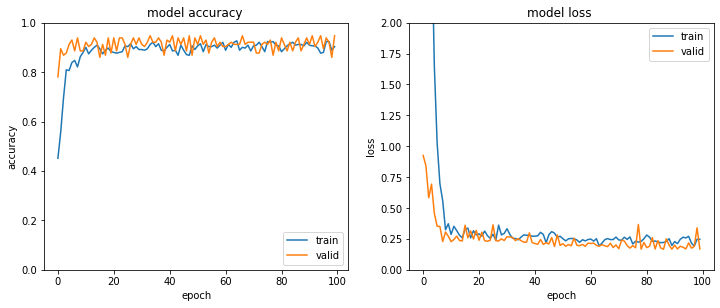

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylim(0, 1)
plt.title('model accuracy ')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(2,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss ')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.ylim([0,2])